In [ ]:
# Exploring and mapping census data
## Here, we'll be looking at different demographic data which we hope to eventually map alongside crime and neighborhood pattern data in other notebooks.

In [ ]:
### First, we'll start with importing our libraries and data. We'll be looking at four census variables: race, income, housing, and education.

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
race = gpd.read_file('../data/ACS 2014-18 Data/Race_2014_18.csv')

In [3]:
# how many columns/rows does it have?
race.shape

(2346, 21)

In [4]:
# what does the data look like?

race.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Total Population,Population Density (Per Sq. Mile),Area (Land),Total Population:,...,Total Population: Black or African American Alone,Total Population: American Indian and Alaska Native Alone,Total Population: Asian Alone,Total Population: Native Hawaiian and Other Pacific Islander Alone,Total Population: Some Other Race Alone,Total Population: Two or More Races,Total Population: Hispanic or Latino,Total Population: Hispanic or Latino: Two or More Races,Total: Two or More Asian,geometry
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,9780.452,0.441083897,4314,...,47,4,329,4,499,117,1359,62,0,None
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,3172.779,1.020871525,3239,...,61,13,206,0,61,61,143,0,0,None
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,24089.21,0.251232824,6052,...,172,0,260,0,736,113,2584,68,0,None
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,12959.46,0.269841405,3497,...,71,0,302,0,487,143,1315,45,0,None
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,4311.606,0.99661234,4297,...,161,0,289,0,48,94,284,34,0,None


In [5]:
# let's look at the data types

race.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   FIPS                                                                2346 non-null   object  
 1   Name of Area                                                        2346 non-null   object  
 2   Qualifying Name                                                     2346 non-null   object  
 3   State (FIPS)                                                        2346 non-null   object  
 4   County                                                              2346 non-null   object  
 5   Census Tract                                                        2346 non-null   object  
 6   Total Population                                                    2346 non-null   object  
 7 

In [6]:
# now let's look at the FIPs code

race.FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: FIPS, dtype: object

In [7]:
# specify FIPS columns as a string to add leading zero
race = pd.read_csv(
    '../data/ACS 2014-18 Data/Race_2014_18.csv',
    dtype=
    {
        'FIPS':str,
        'State (FIPS)':str,
        'County': str
    }
)

In [8]:
# add additional code to specify FIPS column as a string; check to see whether the change has been made
race['FIPS'] = race['FIPS'].str.zfill(11)
race.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Total Population,Total Population.1,Population Density (Per Sq. Mile),Area (Land),...,Total Population: White Alone,Total Population: Black or African American Alone,Total Population: American Indian and Alaska Native Alone,Total Population: Asian Alone,Total Population: Native Hawaiian and Other Pacific Islander Alone,Total Population: Some Other Race Alone,Total Population: Two or More Races,Total Population: Hispanic or Latino,Total Population: Hispanic or Latino: Two or More Races,Total: Two or More Asian
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,4314,9780.452,0.441084,...,3314,47,4,329,4,499,117,1359,62,0
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,3239,3172.779,1.020872,...,2837,61,13,206,0,61,61,143,0,0
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,6052,24089.210,0.251233,...,4771,172,0,260,0,736,113,2584,68,0
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,3497,12959.460,0.269841,...,2494,71,0,302,0,487,143,1315,45,0
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,4297,4311.606,0.996612,...,3705,161,0,289,0,48,94,284,34,0


In [9]:
# now let's confirm the new data types again
race.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   FIPS                                                                2346 non-null   object 
 1   Name of Area                                                        2346 non-null   object 
 2   Qualifying Name                                                     2346 non-null   object 
 3   State (FIPS)                                                        2346 non-null   object 
 4   County                                                              2346 non-null   object 
 5   Census Tract                                                        2346 non-null   int64  
 6   Total Population                                                    2346 non-null   int64  
 7   Total Populatio

In [10]:
# check to see how many columns have all null values
race.columns[race.isna().all()].tolist()

[]

In [11]:
# check to see how many columns have any null values
race.columns[race.isna().any()].tolist()

['Population Density (Per Sq. Mile)']

In [12]:
# let's look at the data one more time

race.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Total Population,Total Population.1,Population Density (Per Sq. Mile),Area (Land),...,Total Population: White Alone,Total Population: Black or African American Alone,Total Population: American Indian and Alaska Native Alone,Total Population: Asian Alone,Total Population: Native Hawaiian and Other Pacific Islander Alone,Total Population: Some Other Race Alone,Total Population: Two or More Races,Total Population: Hispanic or Latino,Total Population: Hispanic or Latino: Two or More Races,Total: Two or More Asian
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,4314,9780.452,0.441084,...,3314,47,4,329,4,499,117,1359,62,0
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,3239,3172.779,1.020872,...,2837,61,13,206,0,61,61,143,0,0
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,6052,24089.210,0.251233,...,4771,172,0,260,0,736,113,2584,68,0
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,3497,12959.460,0.269841,...,2494,71,0,302,0,487,143,1315,45,0
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,4297,4311.606,0.996612,...,3705,161,0,289,0,48,94,284,34,0


In [13]:
# rename columns
columns = list(race) 
columns

['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State (FIPS)',
 'County',
 'Census Tract',
 'Total Population',
 'Total Population.1',
 'Population Density (Per Sq. Mile)',
 'Area (Land)',
 'Total Population:',
 'Total Population: White Alone',
 'Total Population: Black or African American Alone',
 'Total Population: American Indian and Alaska Native Alone',
 'Total Population: Asian Alone',
 'Total Population: Native Hawaiian and Other Pacific Islander Alone',
 'Total Population: Some Other Race Alone',
 'Total Population: Two or More Races',
 'Total Population: Hispanic or Latino',
 'Total Population: Hispanic or Latino: Two or More Races',
 'Total: Two or More Asian']

In [14]:
race.columns = ['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State FIPS',
 'County FIPS',
 'Census Tract',
 'Total Population',
 'Total Population.1',
 'Population Density (Per Sq. Mile)',
 'Area (Land)',
 'Total Population:',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Some Other Race',
 'Two or More Races',
 'Hispanic or Latino',
 'Hispanic or Latino: Two or More Races',
 'Two or More Asian']

In [15]:
# name columns to drop
columns_to_drop = ['Total Population.1','Area (Land)','Total Population:']

In [16]:
#  and now drop columns!
race = race.drop(columns_to_drop,axis=1)
race.head()

,FIPS,Name of Area,Qualifying Name,State FIPS,County FIPS,Census Tract,Total Population,Population Density (Per Sq. Mile),White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,Hispanic or Latino,Hispanic or Latino: Two or More Races,Two or More Asian
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,9780.452,3314,47,4,329,4,499,117,1359,62,0
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,3172.779,2837,61,13,206,0,61,61,143,0,0
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,24089.210,4771,172,0,260,0,736,113,2584,68,0
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,12959.460,2494,71,0,302,0,487,143,1315,45,0
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,4311.606,3705,161,0,289,0,48,94,284,34,0


In [17]:
# I think i'd actually like to rename more columns
columns = list(race) 
columns

['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State FIPS',
 'County FIPS',
 'Census Tract',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Some Other Race',
 'Two or More Races',
 'Hispanic or Latino',
 'Hispanic or Latino: Two or More Races',
 'Two or More Asian']

In [18]:
race.columns = ['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State FIPS',
 'County FIPS',
 'Census Tract',
 'Total Pop',
 'Population Density (Per Sq. Mile)',
 'White',
 'Black/African American',
 'American Indian/Alaska Native',
 'Asian',
 'Native Hawaiian/Other Pacific Islander',
 'Some Other Race',
 'Two or More Races',
 'Hispanic or Latino',
 'Hispanic or Latino: Two or More',
 'Two or More Asian']

In [19]:
# let's double check our work
race.head()

,FIPS,Name of Area,Qualifying Name,State FIPS,County FIPS,Census Tract,Total Pop,Population Density (Per Sq. Mile),White,Black/African American,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Some Other Race,Two or More Races,Hispanic or Latino,Hispanic or Latino: Two or More,Two or More Asian
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,9780.452,3314,47,4,329,4,499,117,1359,62,0
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,3172.779,2837,61,13,206,0,61,61,143,0,0
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,24089.210,4771,172,0,260,0,736,113,2584,68,0
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,12959.460,2494,71,0,302,0,487,143,1315,45,0
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,4311.606,3705,161,0,289,0,48,94,284,34,0


In [20]:
# look at stats
race['Total Pop'].describe()

count     2346.000000
mean      4304.369991
std       1573.116133
min          0.000000
25%       3232.500000
50%       4242.500000
75%       5314.500000
max      13277.000000
Name: Total Pop, dtype: float64

In [21]:
len(race)

2346

In [22]:
# let's see if there are now any columns with null values

race.isna().sum()

FIPS                                      0
Name of Area                              0
Qualifying Name                           0
State FIPS                                0
County FIPS                               0
Census Tract                              0
Total Pop                                 0
Population Density (Per Sq. Mile)         3
White                                     0
Black/African American                    0
American Indian/Alaska Native             0
Asian                                     0
Native Hawaiian/Other Pacific Islander    0
Some Other Race                           0
Two or More Races                         0
Hispanic or Latino                        0
Hispanic or Latino: Two or More           0
Two or More Asian                         0
dtype: int64

In [23]:
# drop pop density column; it has null values and we don't need the column
columns_to_drop = ['Population Density (Per Sq. Mile)']

In [24]:
# drop it and let's see that again

race = race.drop(columns_to_drop,axis=1)
race.head()

,FIPS,Name of Area,Qualifying Name,State FIPS,County FIPS,Census Tract,Total Pop,White,Black/African American,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Some Other Race,Two or More Races,Hispanic or Latino,Hispanic or Latino: Two or More,Two or More Asian
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,3314,47,4,329,4,499,117,1359,62,0
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,2837,61,13,206,0,61,61,143,0,0
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,4771,172,0,260,0,736,113,2584,68,0
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,2494,71,0,302,0,487,143,1315,45,0
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,3705,161,0,289,0,48,94,284,34,0


In [25]:
race.isna().sum()

FIPS                                      0
Name of Area                              0
Qualifying Name                           0
State FIPS                                0
County FIPS                               0
Census Tract                              0
Total Pop                                 0
White                                     0
Black/African American                    0
American Indian/Alaska Native             0
Asian                                     0
Native Hawaiian/Other Pacific Islander    0
Some Other Race                           0
Two or More Races                         0
Hispanic or Latino                        0
Hispanic or Latino: Two or More           0
Two or More Asian                         0
dtype: int64

In [ ]:
# Income: now let's clean income data

In [26]:
# perform same functions with income variable
income = gpd.read_file('../data/ACS 2014-18 Data/Income_2014_18 adjusted.csv')
income.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Total Population,Households:,Median Household Income (In 2018 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units: Owner Occupied,...,Median Household Income (In 2018 Inflation Adjusted Dollars): White Alone Householder,Median Household Income (In 2018 Inflation Adjusted Dollars): Black or African American Alone Householder,Median Household Income (In 2018 Inflation Adjusted Dollars): American Indian and Alaska Native Alone Householder,Median Household Income (In 2018 Inflation Adjusted Dollars): Asian Alone,Median Household Income (In 2018 Inflation Adjusted Dollars): Native Hawaiian and Other Pacific Islander Alone Householder,Median Household Income (In 2018 Inflation Adjusted Dollars): Some Other Race Alone Householder,Median Household Income (In 2018 Inflation Adjusted Dollars): Two or More Races Householder,Median Household Income (In 2018 Inflation Adjusted Dollars): Hispanic or Latino Householder,"Median Household Income (In 2018 Inflation Adjusted Dollars): White Alone Householder, Not Hispanic or Latino",geometry
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,1596,53077,90038,...,49596,,,77639,,57625,70625,53625,48860,None
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,1256,88953,101136,...,88488,,,,,108409,,89257,87311,None
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,2321,32119,91477,...,30713,,,,,40526,,32039,30944,None
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,1294,41728,78047,...,39330,,,48375,,67778,,46393,39330,None
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,1435,86914,86953,...,85938,,,118147,,,121563,187989,81786,None


In [27]:
# let's look at the data types

income.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 37 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype   
---  ------                                                                                                                       --------------  -----   
 0   FIPS                                                                                                                         2346 non-null   object  
 1   Name of Area                                                                                                                 2346 non-null   object  
 2   Qualifying Name                                                                                                              2346 non-null   object  
 3   State (FIPS)                                                                                             

In [28]:
# add leading zero to FIPS code
race['FIPS'] = race['FIPS'].str.zfill(11)
race.head()

,FIPS,Name of Area,Qualifying Name,State FIPS,County FIPS,Census Tract,Total Pop,White,Black/African American,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Some Other Race,Two or More Races,Hispanic or Latino,Hispanic or Latino: Two or More,Two or More Asian
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,3314,47,4,329,4,499,117,1359,62,0
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,2837,61,13,206,0,61,61,143,0,0
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,4771,172,0,260,0,736,113,2584,68,0
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,2494,71,0,302,0,487,143,1315,45,0
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,3705,161,0,289,0,48,94,284,34,0


In [29]:
# confirm the new data types
income.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 37 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype   
---  ------                                                                                                                       --------------  -----   
 0   FIPS                                                                                                                         2346 non-null   object  
 1   Name of Area                                                                                                                 2346 non-null   object  
 2   Qualifying Name                                                                                                              2346 non-null   object  
 3   State (FIPS)                                                                                             

In [30]:
# check to see how many columns have all null values
income.columns[income.isna().all()].tolist()

['geometry']

In [31]:
# check to see how many columns have any null values
income.columns[income.isna().any()].tolist()

['geometry']

In [79]:
# rename columns
columns = list(income) 
columns

['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State (FIPS)',
 'County',
 'Census Tract',
 'Total Pop',
 'Households:',
 'Median HH Income_2018 Adjusted',
 'Median Homeowner Income',
 'Median Renter Income',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or More',
 'Median HH Income_2018 Adjusted: White',
 'Median HH Income_2018 Adjusted: Black/African American',
 'Median HH Income_2018 Adjusted: American Indian.Alaska Native',
 'Median HH Income_2018 Adjusted: Asian',
 'Median HH Income_2018 Adjusted: Native Hawaiian.Other Pacific Islander',
 'Median HH Income_2018 Adjusted: Some Other Race',
 'Median HH Income_2018 Adjusted: Two or More Races',
 'Median HH Income_2018 Adjust

In [33]:
income.columns = ['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State (FIPS)',
 'County',
 'Census Tract',
 'Total Pop',
 'Households:',
 'Median HH Income_2018 Adjusted',
 'Median Homeowner Income',
 'Median Renter Income',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or More',
 'Median HH Income_2018 Adjusted: White',
 'Median HH Income_2018 Adjusted: Black/African American',
 'Median HH Income_2018 Adjusted: American Indian.Alaska Native',
 'Median HH Income_2018 Adjusted: Asian',
 'Median HH Income_2018 Adjusted: Native Hawaiian.Other Pacific Islander',
 'Median HH Income_2018 Adjusted: Some Other Race',
 'Median HH Income_2018 Adjusted: Two or More Races',
 'Median HH Income_2018 Adjusted: Hispanic or Latino',
 'Median HH Income_2018 Adjusted: White, Not Hispanic or Latino',
 'geometry']

In [34]:
# look at our work again

income.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Total Pop,Households:,Median HH Income_2018 Adjusted,Median Homeowner Income,...,Median HH Income_2018 Adjusted: White,Median HH Income_2018 Adjusted: Black/African American,Median HH Income_2018 Adjusted: American Indian.Alaska Native,Median HH Income_2018 Adjusted: Asian,Median HH Income_2018 Adjusted: Native Hawaiian.Other Pacific Islander,Median HH Income_2018 Adjusted: Some Other Race,Median HH Income_2018 Adjusted: Two or More Races,Median HH Income_2018 Adjusted: Hispanic or Latino,"Median HH Income_2018 Adjusted: White, Not Hispanic or Latino",geometry
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,1596,53077,90038,...,49596,,,77639,,57625,70625,53625,48860,None
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,1256,88953,101136,...,88488,,,,,108409,,89257,87311,None
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,2321,32119,91477,...,30713,,,,,40526,,32039,30944,None
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,1294,41728,78047,...,39330,,,48375,,67778,,46393,39330,None
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,1435,86914,86953,...,85938,,,118147,,,121563,187989,81786,None


In [35]:
# drop columns
columns_to_drop = ['Median HH Income_2018 Adjusted: White, Not Hispanic or Latino',
 'geometry']

In [36]:
income = income.drop(columns_to_drop,axis=1)
income.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Total Pop,Households:,Median HH Income_2018 Adjusted,Median Homeowner Income,...,"$150,000 to $199,999","$200,000 or More",Median HH Income_2018 Adjusted: White,Median HH Income_2018 Adjusted: Black/African American,Median HH Income_2018 Adjusted: American Indian.Alaska Native,Median HH Income_2018 Adjusted: Asian,Median HH Income_2018 Adjusted: Native Hawaiian.Other Pacific Islander,Median HH Income_2018 Adjusted: Some Other Race,Median HH Income_2018 Adjusted: Two or More Races,Median HH Income_2018 Adjusted: Hispanic or Latino
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,4314,1596,53077,90038,...,109,44,49596,,,77639,,57625,70625,53625
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,3239,1256,88953,101136,...,133,192,88488,,,,,108409,,89257
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,6052,2321,32119,91477,...,14,71,30713,,,,,40526,,32039
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,3497,1294,41728,78047,...,43,39,39330,,,48375,,67778,,46393
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,4297,1435,86914,86953,...,195,184,85938,,,118147,,,121563,187989


In [ ]:
# Housing: Exploring the housing variable

In [37]:
# perform same functions with housing variable
housing = gpd.read_file('../data/ACS 2014-18 Data/Housing Tenure 2014_18.csv')
housing.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Geographic Identifier,Total Population,Housing Units,Occupied Housing Units:,Occupied Housing Units: Owner Occupied,Occupied Housing Units: Renter Occupied,geometry
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,14000US06037101110,4314,1743,1596,767,829,None
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,14000US06037101122,3239,1391,1256,1026,230,None
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,14000US06037101210,6052,2402,2321,337,1984,None
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,14000US06037101220,3497,1328,1294,471,823,None
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,14000US06037101300,4297,1584,1435,1268,167,None


In [38]:
# add leading zero to FIPS code
housing['FIPS'] = housing['FIPS'].str.zfill(11)
housing.head()

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Census Tract,Geographic Identifier,Total Population,Housing Units,Occupied Housing Units:,Occupied Housing Units: Owner Occupied,Occupied Housing Units: Renter Occupied,geometry
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,14000US06037101110,4314,1743,1596,767,829,None
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,14000US06037101122,3239,1391,1256,1026,230,None
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,14000US06037101210,6052,2402,2321,337,1984,None
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,14000US06037101220,3497,1328,1294,471,823,None
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,14000US06037101300,4297,1584,1435,1268,167,None


In [39]:
# confirm the new data types
housing.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   FIPS                                     2346 non-null   object  
 1   Name of Area                             2346 non-null   object  
 2   Qualifying Name                          2346 non-null   object  
 3   State (FIPS)                             2346 non-null   object  
 4   County                                   2346 non-null   object  
 5   Census Tract                             2346 non-null   object  
 6   Geographic Identifier                    2346 non-null   object  
 7   Total Population                         2346 non-null   object  
 8   Housing Units                            2346 non-null   object  
 9   Occupied Housing Units:                  2346 non-null   object  
 10  Occupied Housing Units: Owne

In [40]:
# check to see how many columns have all null values
housing.columns[housing.isna().all()].tolist()

['geometry']

In [41]:
# check to see how many columns have ANY null values
housing.columns[housing.isna().any()].tolist()

['geometry']

In [42]:
# rename columns
columns = list(housing) 
columns

['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State (FIPS)',
 'County',
 'Census Tract',
 'Geographic Identifier',
 'Total Population',
 'Housing Units',
 'Occupied Housing Units:',
 'Occupied Housing Units: Owner Occupied',
 'Occupied Housing Units: Renter Occupied',
 'geometry']

In [43]:
housing.columns = ['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State_FIPS',
 'County_FIPS',
 'Census Tract',
 'Geographic Identifier',
 'Total Pop',
 'Housing Units',
 'Total Occupied Housing Units',
 'Owner Occupied',
 'Renter Occupied',
 'geometry']

In [44]:
housing.head()

,FIPS,Name of Area,Qualifying Name,State_FIPS,County_FIPS,Census Tract,Geographic Identifier,Total Pop,Housing Units,Total Occupied Housing Units,Owner Occupied,Renter Occupied,geometry
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,14000US06037101110,4314,1743,1596,767,829,None
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,14000US06037101122,3239,1391,1256,1026,230,None
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,14000US06037101210,6052,2402,2321,337,1984,None
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,14000US06037101220,3497,1328,1294,471,823,None
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,14000US06037101300,4297,1584,1435,1268,167,None


In [45]:
# drop columns
columns_to_drop = ['Geographic Identifier','geometry']

In [ ]:
# Housing
## Great! now we're down to our last variable

In [102]:
# ok let's drop the columns again
housing = housing.drop(columns_to_drop,axis=1)
housing.head()

KeyError: "['geometry'] not found in axis"

In [47]:
# perform same functions with education variable
education = gpd.read_file('../data/ACS 2014-18 Data/Educational Attainment.csv')
education.head()

,FIPS,Name of Area,Qualifying Name,County,Census Tract,Total Population,Population 25 Years and Over:,Population 25 Years and Over: Less than High School,Population 25 Years and Over: High School Graduate (Includes Equivalency),Population 25 Years and Over: Some College,Population 25 Years and Over: Bachelor's Degree,Population 25 Years and Over: Master's Degree,Population 25 Years and Over: Professional School Degree,Population 25 Years and Over: Doctorate Degree,geometry
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",37,101110,4314,3085,524,765,1101,411,180,50,54,None
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",37,101122,3239,2597,168,749,888,463,248,13,68,None
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",37,101210,6052,4107,762,1185,1340,548,174,36,62,None
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",37,101220,3497,2484,515,700,769,347,129,0,24,None
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",37,101300,4297,3446,362,949,1145,604,278,82,26,None


In [48]:
# add leading zero to FIPS code
education['FIPS'] = education['FIPS'].str.zfill(11)
education.head()

,FIPS,Name of Area,Qualifying Name,County,Census Tract,Total Population,Population 25 Years and Over:,Population 25 Years and Over: Less than High School,Population 25 Years and Over: High School Graduate (Includes Equivalency),Population 25 Years and Over: Some College,Population 25 Years and Over: Bachelor's Degree,Population 25 Years and Over: Master's Degree,Population 25 Years and Over: Professional School Degree,Population 25 Years and Over: Doctorate Degree,geometry
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",37,101110,4314,3085,524,765,1101,411,180,50,54,None
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",37,101122,3239,2597,168,749,888,463,248,13,68,None
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",37,101210,6052,4107,762,1185,1340,548,174,36,62,None
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",37,101220,3497,2484,515,700,769,347,129,0,24,None
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",37,101300,4297,3446,362,949,1145,604,278,82,26,None


In [49]:
# confirm the new data types
education.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype   
---  ------                                                                     --------------  -----   
 0   FIPS                                                                       2346 non-null   object  
 1   Name of Area                                                               2346 non-null   object  
 2   Qualifying Name                                                            2346 non-null   object  
 3   County                                                                     2346 non-null   object  
 4   Census Tract                                                               2346 non-null   object  
 5   Total Population                                                           2346 non-null   object  
 6   Population 25 Years and Over:           

In [50]:
# rename columns
columns = list(education) 
columns

['FIPS',
 'Name of Area',
 'Qualifying Name',
 'County',
 'Census Tract',
 'Total Population',
 'Population 25 Years and Over:',
 'Population 25 Years and Over: Less than High School',
 'Population 25 Years and Over: High School Graduate (Includes Equivalency)',
 'Population 25 Years and Over: Some College',
 "Population 25 Years and Over: Bachelor's Degree",
 "Population 25 Years and Over: Master's Degree",
 'Population 25 Years and Over: Professional School Degree',
 'Population 25 Years and Over: Doctorate Degree',
 'geometry']

In [51]:
education.columns = ['FIPS',
 'Name of Area',
 'Qualifying Name',
 'County',
 'Census Tract',
 'Total Pop',
 'Pop 25 Yrs and Over',
 'Less than High School',
 'High School Graduate (Includes Equivalency)',
 'Some College',
 "Bachelor's Degree",
 "Master's Degree",
 'Professional School Degree',
 'Doctorate Degree',
 'geometry']

education.head()

,FIPS,Name of Area,Qualifying Name,County,Census Tract,Total Pop,Pop 25 Yrs and Over,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,geometry
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",37,101110,4314,3085,524,765,1101,411,180,50,54,None
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",37,101122,3239,2597,168,749,888,463,248,13,68,None
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",37,101210,6052,4107,762,1185,1340,548,174,36,62,None
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",37,101220,3497,2484,515,700,769,347,129,0,24,None
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",37,101300,4297,3446,362,949,1145,604,278,82,26,None


In [52]:
# drop columns
columns_to_drop = ['geometry']

In [53]:
education = education.drop(columns_to_drop,axis=1)
education.head()

,FIPS,Name of Area,Qualifying Name,County,Census Tract,Total Pop,Pop 25 Yrs and Over,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",37,101110,4314,3085,524,765,1101,411,180,50,54
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",37,101122,3239,2597,168,749,888,463,248,13,68
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",37,101210,6052,4107,762,1185,1340,548,174,36,62
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",37,101220,3497,2484,515,700,769,347,129,0,24
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",37,101300,4297,3446,362,949,1145,604,278,82,26


In [ ]:
# Mapping
## Finally! Let's start by mapping race on census tract data

In [69]:
# read census stract geojson
tracts=gpd.read_file('../data/la_tracts.geojson')
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [70]:
# learn more about this dataset
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


In [71]:
# drop columns
tracts = tracts[['name','geometry']]
tracts.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [72]:
# rename columns
tracts.columns = ['FIPS','geometry']
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


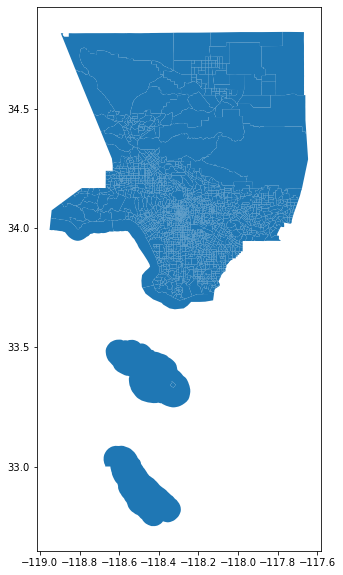

In [73]:
#what does it look like?

tracts.plot(figsize=(12,10))

In [98]:
# let's now merge race data on census tracts

tracts_race=tracts.merge(race,on="FIPS")

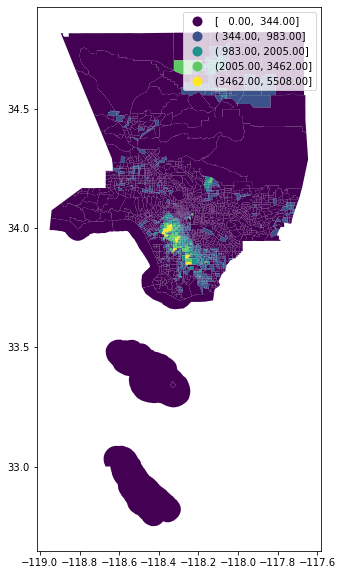

In [99]:
# and map it! Here we're specifically looking at the Black population, since the Black community makes up a large chunk of the 77th Division.

tracts_race.plot(figsize=(12,10),
                 column='Black/African American',
                 legend=True, 
                 scheme='NaturalBreaks')

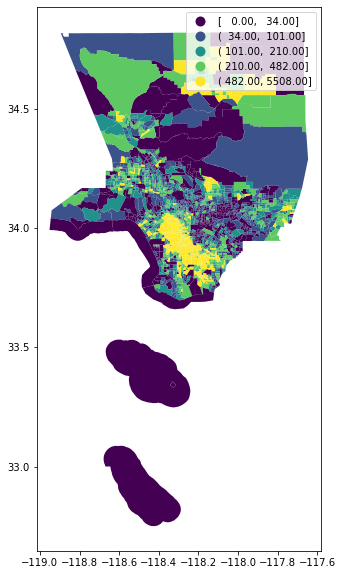

In [75]:
# let's see what it would look like for a quantile division

tracts_race.plot(figsize=(12,10),
                 column='Black/African American',
                 legend=True, 
                 scheme='Quantiles')

In [ ]:
## okay, done for now. Next, we hope to trim this data down only to show those witin the 77th Division, overlay more census data and *eventually* overlay our neighborhood data.

In [ ]:
# Cynthia conducted the data exploration and mapping for LA_crime. She also downloaded relevant data for this
# Gerrlyn conducted the data exploration and mapping for landlord acquisitions and cleaned the census data for our region. She also downloaded all census data.
# Powerpoint presentation was done jointly.